In [ ]:
# Import the necessary libraries that are being used below
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, RNN, GRU, Input
from tensorflow.keras.optimizers import Adam


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# readinag given csv file
# and creating dataframe
df = pd.read_csv("/content/drive/MyDrive/First_project/Original Dataset/merged_csv_files_multi/labeled_CAN_dataset.csv" )

In [ ]:
df

,Timestamp,ID,DLC,DATA,Class
0,0.000000,0316 000,8,05 20 ea 0a 20 1a 00 7f,0
1,0.000224,0329 000,8,d7 a7 7f 8c 11 2f 00 10,0
2,0.000462,0080 000,8,00 17 ea 0a 20 1a 20 43,0
3,0.000704,0081 000,8,7f 84 60 00 00 00 00 53,0
4,0.000878,0120 000,4,00 00 00 00,0
...,...,...,...,...,...
3025972,306.295869,0000 000,8,00 00 00 00 00 00 00 00,1
3025973,306.296118,0081 000,8,40 84 89 00 00 00 00 f0,0
3025974,306.296365,0000 000,8,00 00 00 00 00 00 00 00,1
3025975,306.296624,018f 000,8,00 3b 18 00 00 3f 00 00,0


In [ ]:
# df.drop(columns=['Timestamp'], inplace=True)

In [ ]:
df.groupby('Class').count()

,Timestamp,ID,DLC,DATA
Class,,,,
0,2690353,2690353,2690353,2690353
1,335624,335624,335624,335624


In [ ]:
label_encoder = LabelEncoder()
df['ID'] = label_encoder.fit_transform(df['ID'])
df['DATA'] = label_encoder.fit_transform(df['DATA'])
# X = df[['Timestamp', 'ID', 'DLC', 'DATA']].values
X = df[['ID', 'DLC', 'DATA']].values
y = df['Class'].values

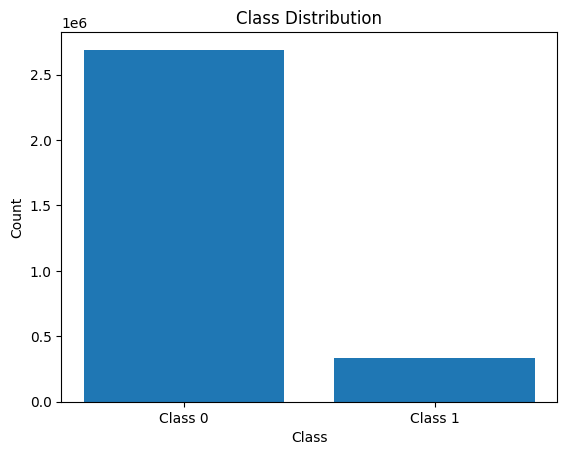

In [ ]:
import matplotlib.pyplot as plt


# Convert 'y' to a Pandas Series:
y_series = pd.Series(y)

# Now, you can use value_counts()
count_class = y_series.value_counts()

# Rest of your code remains the same
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])  # Assuming you have 2 classes: 0 and 1
plt.show()

In [ ]:
# !pip install imbalanced-learn

In [ ]:
X.shape[1]

3

In [ ]:
# Reshape the input data to have a temporal dimension
# X = X.reshape(X.shape[0],1, X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
y_train_series = pd.Series(y_train)
y_train_series.value_counts()

,count
0,2152401
1,268380


In [ ]:
# Split X_train and y_train into three parts
# X_train_part1, X_train_rest, y_train_part1, y_train_rest = train_test_split(
#     X_train, y_train, test_size=3/4, random_state=42  # Use a random state for reproducibility
# )
# y_train_part1_series = pd.Series(y_train_part1)
# y_train_part1_series.value_counts()


,count
0,538139
1,67056


In [ ]:
# Reshape X_train_part1 to 2D before applying SMOTE
# X_train_part1 = X_train_part1.reshape(X_train_part1.shape[0], X_train_part1.shape[2])


In [ ]:
# y_train_part1.shape

(605195,)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the first part
smote = SMOTE(sampling_strategy='minority', random_state=42)  # Adjust sampling_strategy if needed
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Combine the SMOTE-oversampled part with the remaining parts
# X_train_final = np.concatenate([X_train_part1_smote, X_train_rest])
# y_train_final = np.concatenate([y_train_part1_smote, y_train_rest])

In [ ]:
y_train_part1_smote = pd.Series(y_train_smote)
y_train_part1_smote.value_counts()

,count
0,2152401
1,2152401


In [ ]:

# from imblearn.over_sampling import SMOTE

# smote=SMOTE(sampling_strategy='minority')
# X_train,y_train=smote.fit_resample(X_train,y_train)
# y_train.value_counts()

In [ ]:
# from imblearn.combine import SMOTETomek

# smote_tomek = SMOTETomek(sampling_strategy='auto')
# X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)


In [ ]:
X_train.shape[0]

2420781

In [ ]:
y_train.shape[0]

NameError: name 'y_train' is not defined

In [ ]:
# import tensorflow as tf

# class EQLv2Loss(tf.keras.losses.Loss):
#     def __init__(self, num_classes, alpha=0.001, **kwargs):
#         super(EQLv2Loss, self).__init__(**kwargs)
#         self.num_classes = num_classes
#         self.alpha = alpha  # Suppression threshold parameter
#         self.suppression_count = tf.Variable(
#             initial_value=tf.zeros([self.num_classes],  dtype=tf.float32), trainable=False
#         )

#     def call(self, y_true, y_pred):
#         # Convert labels to one-hot format
#         y_true_one_hot = tf.one_hot(tf.cast(y_true, tf.int32), depth=self.num_classes)

#         # Compute the cross-entropy loss
#         ce_loss = tf.keras.losses.categorical_crossentropy(y_true_one_hot, y_pred, from_logits=True)

#         # Get predicted class and its probability
#         predicted_class = tf.argmax(y_pred, axis=-1)
#         predicted_prob = tf.reduce_max(tf.nn.softmax(y_pred, axis=-1), axis=-1)

#         # Mask for misclassified samples
#         incorrect_mask = tf.cast(tf.not_equal(tf.argmax(y_true_one_hot, axis=-1), predicted_class), tf.float32)

#         # Update the suppression count for each class
#         # self.suppression_count.assign_add(tf.reduce_sum(incorrect_mask, axis=0))
#         self.suppression_count.assign_add(tf.reduce_sum(tf.cast(incorrect_mask, dtype=tf.float32), axis=0)) # Cast incorrect_mask to float32

#         # Suppress negative gradients for majority classes based on threshold (alpha)
#         suppression_mask = self.suppression_count < (self.alpha * tf.reduce_sum(self.suppression_count))
#         suppression_mask = tf.cast(suppression_mask, tf.float32)

#         # Apply suppression to the loss (only suppress negative gradients of majority classes)
#         loss = ce_loss * (1 - suppression_mask) + ce_loss * suppression_mask * incorrect_mask

#         return tf.reduce_mean(loss)

# # Example of using the custom loss with a model
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
#     tf.keras.layers.Dense(10)
# ])

# # Compile the model with the custom EQL v2 loss
# model.compile(optimizer='adam', loss=EQLv2Loss(num_classes=10))

# Model training
# model.fit(X_train, y_train, epochs=10)


In [ ]:
# !pip install tensorflow_addons

In [ ]:
# from tensorflow_addons.losses import EQLv2Loss

In [ ]:
# Find the unique classes in your y_train data and their count
# unique_classes, class_counts = np.unique(y_train, return_counts=True)
# print(f"Unique classes: {unique_classes}, Counts: {class_counts}")

# # Get the number of unique classes
# num_classes = len(unique_classes)

In [ ]:
# from tensorflow.keras import layers, models, backend as K

# # Custom EQL v2 Loss Function
# def eql_v2_loss(y_true, y_pred):
#     """EQL v2 loss function that penalizes large weights on certain neurons."""

#     # Cast y_true to float32 to match y_pred's type
#     y_true = tf.cast(y_true, dtype=tf.float32)
#     mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))  # Standard MSE

#     # Penalize based on the magnitude of weights to encourage feature sparsity
#     weight_penalty = tf.reduce_sum(tf.abs(y_pred))  # L1-like penalty
#     return mse_loss + 0.02 * weight_penalty  # Adjust penalty factor as needed


In [ ]:
from tensorflow.keras import backend as K

In [ ]:
# def focal_loss(gamma=2., alpha=0.25):
#     def focal_loss_fixed(y_true, y_pred):
#         epsilon = K.epsilon()
#         y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
#         y_true = tf.cast(y_true, tf.float32)
#         alpha_t = y_true * alpha + (1 - y_true) * (1 - alpha)
#         p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
#         focal_loss = -alpha_t * K.pow(1. - p_t, gamma) * K.log(p_t)
#         return K.mean(focal_loss)
#     return focal_loss_fixed

In [ ]:
from tensorflow.keras import regularizers


# from sklearn.utils import class_weight

# class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train
# )
# class_weights = dict(enumerate(class_weights))

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import AUC

In [ ]:
# def focal_loss_asymmetric(alpha=0.25, gamma_pos=2.0, gamma_neg=1.0):
#     def loss(y_true, y_pred):
#         y_true = tf.cast(y_true, tf.float32)
#         alpha_t = y_true * alpha + (1 - y_true) * (1 - alpha)
#         p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
#         gamma_t = y_true * gamma_pos + (1 - y_true) * gamma_neg
#         focal_loss = -alpha_t * tf.pow(1. - p_t, gamma_t) * tf.math.log(p_t + K.epsilon())
#         return tf.reduce_mean(focal_loss)
#     return loss

In [ ]:
def focal_loss(y_true, y_pred, alpha=0.25, gamma=2.0):
    """
    Calculates the focal loss.

    Args:
        y_true: Ground truth labels (tensor with shape (batch_size,)).
        y_pred: Predicted probabilities (tensor with shape (batch_size,)).
        alpha: Weighting factor for positive class (default: 0.25).
        gamma: Focusing parameter (default: 2.0).

    Returns:
        Focal loss (tensor with shape (batch_size,)).
    """

    # Convert y_true to float32 if necessary
    y_true = tf.cast(y_true, dtype=tf.float32)

    # Calculate the cross-entropy loss
    ce_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False)

    # Calculate the focusing factor
    pt_t = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
    focal_factor = tf.pow(1 - pt_t, gamma)

    # Apply alpha weighting and focusing factor
    focal_loss = tf.where(tf.equal(y_true, 1), alpha * focal_factor * ce_loss, (1 - alpha) * focal_factor * ce_loss)

    # Return the mean focal loss over the batch
    return tf.reduce_mean(focal_loss)

In [ ]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)

In [ ]:
# Reshape the input data to have a temporal dimension
X_train_smote = X_train_smote.reshape(X_train_smote.shape[0],1, X_train_smote.shape[1])

In [ ]:
def build_model(input_shape, gru_units=64, dense_units2=16):
    inputs = layers.Input(shape=input_shape)



    # GRU Layer (Input Layer) to capture temporal dependencies
    x = layers.GRU(gru_units, return_sequences=False, kernel_regularizer=regularizers.l2(0.01),  # L2 regularization on GRU kernel
                   recurrent_regularizer=regularizers.l2(0.01))(inputs)  # L2 regularization on recurrent kernel)(inputs)  # GRU with 64 units
    # x = layers.BatchNormalization()(x)  # Batch normalization after GRU layer
    x = layers.Dropout(0.2)(x) # Dropout with a rate of 0.2 (20%)

    # Dense Layer with 32 neurons
    # x1 = layers.Dense(dense_units1, activation='relu', kernel_initializer='he_normal')(x)
    # x1 = layers.BatchNormalization()(x1)  # Batch normalization after Dense layer

    # x2 = layers.Dense(dense_units2, activation='relu', kernel_initializer='he_normal')(x)
    # x2 = layers.BatchNormalization()(x2)  # Batch normalization after Dense layer

    x3 = layers.Dense(dense_units2, activation='relu', kernel_initializer='he_normal')(x)
    # x3 = layers.BatchNormalization()(x3)  # Batch normalization after Dense layer
    # Output Layer for binary classification
    outputs = layers.Dense(1, activation='sigmoid')(x3)

    # Build the model
    model = models.Model(inputs, outputs)

    # Compile with custom EQL v2 loss
    # model.compile(
    #     optimizer=Adam(learning_rate=0.01),
    #     loss=eql_v2_loss,
    #     # loss='binary_crossentropy',
    #     # loss=focal_loss_asymmetric(alpha=0.25, gamma_pos=2.0, gamma_neg=1.0),
    #     metrics=['accuracy', AUC(name='auc')]
    # )

    return model

# Define input shape: (sequence_length, num_features)
input_shape = (1, 3)  # Example: 100 frames, 4 features
model = build_model(input_shape)

# Display model summary
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 3)]            0         
                                                                 
 gru_2 (GRU)                 (None, 64)                13248     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 14305 (55.88 KB)
Trainable params: 14305 (55.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.01),  # Using Adam optimizer with a learning rate of 0.01
    loss= BinaryCrossentropy(),       # Using EQL v2 loss with 2 classes (binary classification)
    metrics=['accuracy']                 # Tracking accuracy during training
)

# Train the model
history = model.fit(
    X_train_smote,          # Your training data
    y_train_smote,          # Your training labels
    epochs=50,        # Train for 30 epochs
    batch_size=512,   # Batch size of 512
    validation_split=0.2 ) # Use 20% of the training data for validation

Epoch 1/50
6727/6727 [==============================] - 36s 5ms/step - loss: 0.0178 - accuracy: 0.9996 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 2/50
6727/6727 [==============================] - 33s 5ms/step - loss: 0.0099 - accuracy: 0.9998 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 3/50
6727/6727 [==============================] - 34s 5ms/step - loss: 0.0119 - accuracy: 0.9998 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 4/50
6727/6727 [==============================] - 35s 5ms/step - loss: 0.0179 - accuracy: 0.9998 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 5/50
6727/6727 [==============================] - 34s 5ms/step - loss: 0.0093 - accuracy: 0.9998 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 6/50
6727/6727 [==============================] - 34s 5ms/step - loss: 0.0112 - accuracy: 0.9998 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 7/50
6727/6727 [==============================] - 34s 5ms/step - loss: 0.0112 - accuracy: 0.9998 - val_loss: 0.0059 - val_ac

In [ ]:
from tensorflow.keras.models import clone_model
# import tensorflow_addons as tfa|

# Split data for each ensemble member with balanced class distributions
ensemble_models = []
num_models = 3  # Number of ensemble models

# focal_loss_fn = tfa.losses.SigmoidFocalCrossEntropy()
for i in range(num_models):
    X_train_balanced, _, y_train_balanced, _ = train_test_split(
        X_train, y_train, stratify=y_train, test_size=0.2, random_state=i
    )
    model_copy = clone_model(model)
    model_copy.compile(optimizer='adam', loss=focal_loss, metrics=['accuracy'])
    y_train_balanced = tf.cast(y_train_balanced, dtype=tf.float32)

    hist = model_copy.fit(X_train_balanced, y_train_balanced, epochs=10, validation_split=0.2)
    ensemble_models.append(model_copy)
    # hist = model_copy.fit(X_train_balanced, y_train_balanced, epochs=5, validation_data=(X_test, y_test))
    # ensemble_models.append(model_copy)

Epoch 1/10
48416/48416 ━━━━━━━━━━━━━━━━━━━━ 204s 4ms/step - accuracy: 0.9927 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 7.1546e-04
Epoch 2/10
48416/48416 ━━━━━━━━━━━━━━━━━━━━ 196s 4ms/step - accuracy: 0.9976 - loss: 1.3721e-04 - val_accuracy: 0.8890 - val_loss: 0.0020
Epoch 3/10
48416/48416 ━━━━━━━━━━━━━━━━━━━━ 206s 4ms/step - accuracy: 0.9979 - loss: 1.1340e-04 - val_accuracy: 0.9996 - val_loss: 5.1161e-05
Epoch 4/10
48416/48416 ━━━━━━━━━━━━━━━━━━━━ 201s 4ms/step - accuracy: 0.9974 - loss: 1.2919e-04 - val_accuracy: 0.9996 - val_loss: 3.8617e-05
Epoch 5/10
48416/48416 ━━━━━━━━━━━━━━━━━━━━ 196s 4ms/step - accuracy: 0.9972 - loss: 1.4172e-04 - val_accuracy: 0.9996 - val_loss: 6.7003e-05
Epoch 6/10
48416/48416 ━━━━━━━━━━━━━━━━━━━━ 199s 4ms/step - accuracy: 0.9975 - loss: 1.4315e-04 - val_accuracy: 0.9934 - val_loss: 4.0035e-04
Epoch 7/10
48416/48416 ━━━━━━━━━━━━━━━━━━━━ 201s 4ms/step - accuracy: 0.9976 - loss: 1.1608e-04 - val_accuracy: 0.9996 - val_loss: 4.4503e-05
Epoch 8/10
484

In [ ]:
# Average predictions during inference
def ensemble_predict(X):
    preds = [model.predict(X) for model in ensemble_models]
    return np.mean(preds, axis=0)


res = ensemble_predict(X_test)

18913/18913 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step
18913/18913 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step
18913/18913 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step


In [ ]:
print(res.shape)

NameError: name 'res' is not defined

In [ ]:
acc = model.evaluate(X_test, y_test)

TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/gru.py", line 643, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'gru_2' (type GRU).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'gru_2' (type GRU):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


In [ ]:
def f1(p):
  return 1 if p >= 0.5 else 0

In [ ]:
correct_count = 0
total_count = len(X_test)

# Compare prediction with ground truth label
for i, val in enumerate(X_test):
    if (f1(val) == y_test[i]):
        correct_count += 1

accuracy_percentage = (correct_count / total_count) * 100

# Calculate and print testing accuracy of the TFLite model

print("TF Model Testing Accuracy:", "{:.2f}%".format(accuracy_percentage))

TF Model Testing Accuracy: 100.00%


In [ ]:
# model.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.2)
#           # class_weight=class_weights)

# # Evaluate the model
# loss, accuracy, auc = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
# # Evaluate the model
# loss, accuracy, auc = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(history.history)
print(hist_df.head())
# # save to json:
# hist_json_file = 'history.json'
# with open(hist_json_file, mode='w') as f:
#     hist_df.to_json(f)

# or save to csv:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='wb') as f:
    hist_df.to_csv(f)

       loss  accuracy  val_loss  val_accuracy
0  0.011830  0.999573  0.012793           1.0
1  0.006675  0.999779  0.006482           1.0
2  0.010830  0.999775  0.011527           1.0
3  0.009559  0.999684  0.006481           1.0
4  0.009771  0.999765  0.034624           1.0


In [ ]:
with open(hist_csv_file, mode='r') as f:
    print(pd.read_csv(hist_csv_file))

    Unnamed: 0      loss  accuracy  val_loss  val_accuracy
0            0  0.011830  0.999573  0.012793           1.0
1            1  0.006675  0.999779  0.006482           1.0
2            2  0.010830  0.999775  0.011527           1.0
3            3  0.009559  0.999684  0.006481           1.0
4            4  0.009771  0.999765  0.034624           1.0
5            5  0.005107  0.999856  0.016991           1.0
6            6  0.012814  0.999650  0.057509           1.0
7            7  0.017018  0.999670  0.009012           1.0
8            8  0.009300  0.999855  0.008893           1.0
9            9  0.007491  0.999868  0.005320           1.0
10          10  0.008284  0.999821  0.005424           1.0
11          11  0.006672  0.999841  0.004826           1.0
12          12  0.009240  0.999856  0.006636           1.0
13          13  0.007675  0.999778  0.038352           1.0
14          14  0.009090  0.999743  0.005014           1.0
15          15  0.008581  0.999755  0.005054           1

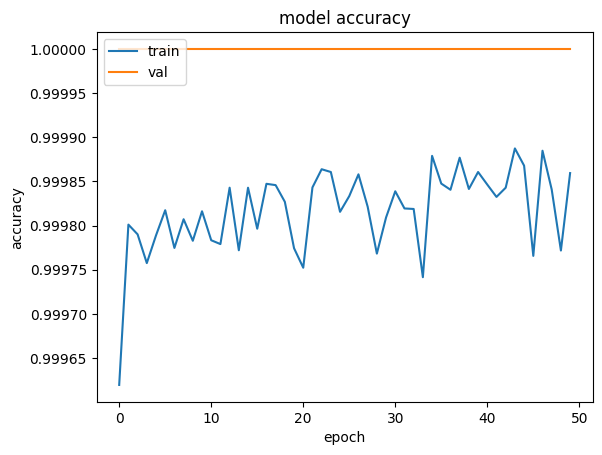

In [ ]:
import matplotlib.pyplot as plt


# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs=range(1,len(loss)+1)
# plt.plot(epochs, loss, 'b.', label='training loss')
# plt.plot(epochs, val_loss, 'r.', label='validate loss')
# plt.title('training loss vs validation loss')
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.legend()
# plt.show()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

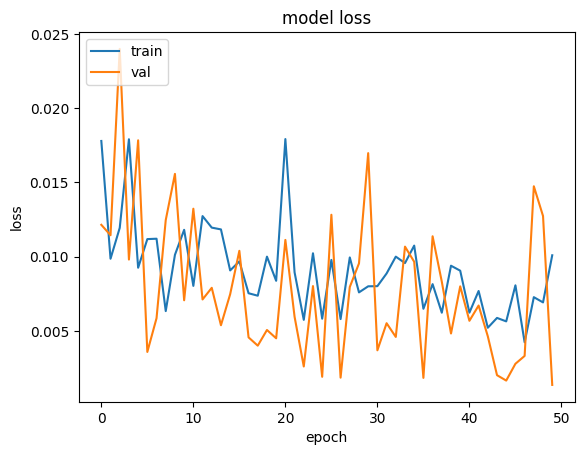

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# import keras
model.save("Multi_DoS_model.h5")

In [ ]:
# model = Sequential()
# model.add(GRU(64, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='softmax'))

In [ ]:
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
# gru_output = GRU(64, return_sequences=True)(inputs)


gru_output = GRU(64)(inputs)
##attention = Attention()([gru_output, gru_output])

# Concatenate the GRU output and the attention output
#context_vector = Concatenate(axis=-1)([gru_output, attention])

# Flatten the context vector
#flattened_context = tf.keras.layers.Flatten()(context_vector)

# Pass through Dense layer
dense_output = Dense(8, activation='relu')(gru_output)
final_output = Dense(2, activation = 'softmax')(dense_output)

# Define the model
model = Model(inputs=inputs, outputs=final_output)
# model.add(Dense(8, activation='ReLU'))
# model.add(Dense(4, activation = 'softmax'))

In [ ]:
import tensorflow as tf

class EQLv2Loss(tf.keras.losses.Loss):
    def __init__(self, num_classes, alpha=0.001, **kwargs):
        super(EQLv2Loss, self).__init__(**kwargs)
        self.num_classes = num_classes
        self.alpha = alpha  # Suppression threshold parameter
        self.suppression_count = tf.Variable(
            initial_value=tf.zeros([self.num_classes]), trainable=False
        )

    def call(self, y_true, y_pred):
        # Convert labels to one-hot format
        y_true_one_hot = tf.one_hot(tf.cast(y_true, tf.int32), depth=self.num_classes)

        # Compute the cross-entropy loss
        ce_loss = tf.keras.losses.categorical_crossentropy(y_true_one_hot, y_pred, from_logits=True)

        # Get predicted class and its probability
        predicted_class = tf.argmax(y_pred, axis=-1)
        predicted_prob = tf.reduce_max(tf.nn.softmax(y_pred, axis=-1), axis=-1)

        # Mask for misclassified samples
        incorrect_mask = tf.cast(tf.not_equal(tf.argmax(y_true_one_hot, axis=-1), predicted_class), tf.float32)

        # Update the suppression count for each class
        # self.suppression_count.assign_add(tf.reduce_sum(incorrect_mask, axis=0))

        # Update suppression count for each class (accumulating across the batch)
        class_counts = tf.reduce_sum(incorrect_mask, axis=0)
        self.suppression_count.assign_add(class_counts)




        # Suppress negative gradients for majority classes based on threshold (alpha)
        suppression_mask = self.suppression_count < (self.alpha * tf.reduce_sum(self.suppression_count))
        suppression_mask = tf.cast(suppression_mask, tf.float32)

        # Apply suppression to the loss (only suppress negative gradients of majority classes)
        loss = ce_loss * (1 - suppression_mask) + ce_loss * suppression_mask * incorrect_mask

        return tf.reduce_mean(loss)

# Model implementation with GRU layer as input
input_shape = (1, 3)  # Input shape with 1 timestep and 3 features

model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(64, input_shape=input_shape),  # 64-unit GRU layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)  # Assuming 10 classes for classification
])

# Compile the model with the custom EQL v2 loss
model.compile(optimizer='adam', loss=EQLv2Loss(num_classes=10))

# Example: Model summary to check the architecture
model.summary()

# Model training
# model.fit(X_train, y_train, epochs=10, batch_size=32)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_5 (GRU)                          │ (None, 64)                  │          13,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,826 (85.26 KB)

 Trainable params: 21,826 (85.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.01),  # Using Adam optimizer with a learning rate of 0.01
    loss=EQLv2Loss(num_classes=2),       # Using EQL v2 loss with 2 classes (binary classification)
    metrics=['accuracy']                 # Tracking accuracy during training
)

# Train the model
history = model.fit(
    X_train,          # Your training data
    y_train,          # Your training labels
    epochs=30,        # Train for 30 epochs
    batch_size=512,   # Batch size of 512
    validation_split=0.2  # Use 20% of the training data for validation
)

Epoch 1/30


ValueError: Shapes must be equal rank, but are 1 and 0 for '{{node compile_loss/eq_lv2_loss_6/AssignAddVariableOp}} = AssignAddVariableOp[dtype=DT_FLOAT](compile_loss/eq_lv2_loss_6/AssignAddVariableOp/resource, compile_loss/eq_lv2_loss_6/Sum)' with input shapes: [], [].

In [ ]:
# y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)

In [ ]:
# model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer=Adam(learning_rate=0.01), loss=EQLv2Loss(num_classes=2), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=512, validation_split=0.2)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:567: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


ValueError: Shapes must be equal rank, but are 1 and 0 for '{{node compile_loss/eq_lv2_loss/AssignAddVariableOp}} = AssignAddVariableOp[dtype=DT_FLOAT](compile_loss/eq_lv2_loss/AssignAddVariableOp/resource, compile_loss/eq_lv2_loss/Sum)' with input shapes: [], [].

In [ ]:
with open('/trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)



In [ ]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(history.history)

# save to json:
hist_json_file = 'history.json'
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
with open('/trainHistoryDict', "rb") as file_pi:
    history = pickle.load(file_pi)

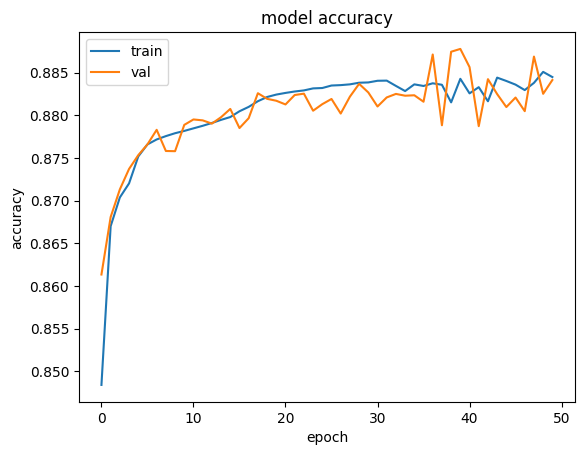

In [ ]:
import matplotlib.pyplot as plt


# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs=range(1,len(loss)+1)
# plt.plot(epochs, loss, 'b.', label='training loss')
# plt.plot(epochs, val_loss, 'r.', label='validate loss')
# plt.title('training loss vs validation loss')
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.legend()
# plt.show()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

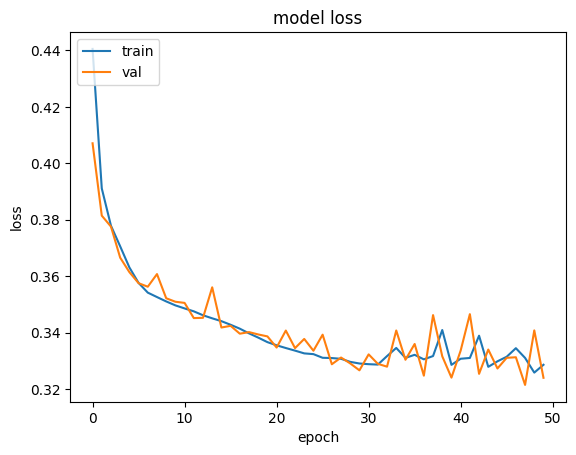

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# import keras
model.save("Multiclass_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
X_train.shape

(4152095, 1, 4)

In [ ]:
import numpy as np

# Select a random index from the test dataset for prediction
random_index = np.random.choice(len(X_test))

# Get the random test data point and its corresponding label
random_test_data = X_test[random_index]
actual_label = y_test[random_index]

# Reshape the random test data point to match the model input shape
random_test_data = random_test_data.reshape(1, 1, X.shape[2])

# Make predictions using the trained model
y_pred = model.predict(random_test_data)

# Convert the prediction probability to binary class (0 or 1)
predicted_class = 1 if y_pred[0][0] >= 0.5 else 0

# Print the predicted class and actual label
print("Predicted Class:", predicted_class)
print("Actual Label:", actual_label)

# Calculate the accuracy for this random test data point
accuracy = (predicted_class == actual_label)

# Print the accuracy
print("Accuracy:", accuracy)


1/1 [==============================] - 0s 39ms/step
Predicted Class: 1
Actual Label: 1
Accuracy: True


# New Section

In [ ]:
y_pred = model.predict(X_test)

14417/14417 [==============================] - 32s 2ms/step


In [ ]:
# Define custom activation functions
def custom_sigmoid(x):
    return 1.0 / (1.0 + tf.exp(-x))

def custom_tanh_inference(x):
    return tf.where(tf.math.greater(x, 0), 1.0, -1.0)

# Create the custom GRU cell
class MyGRUCell(tf.keras.layers.Layer):
    def __init__(self, units, tanh_activation=tf.tanh, sigmoid_activation=tf.sigmoid):
        super(MyGRUCell, self).__init__()
        self.units = units
        self.reset_gate = tf.keras.layers.Dense(units, activation=sigmoid_activation, kernel_initializer='glorot_uniform')
        self.update_gate = tf.keras.layers.Dense(units, activation=sigmoid_activation, kernel_initializer='glorot_uniform')
        self.candidate = tf.keras.layers.Dense(units, activation=tanh_activation, kernel_initializer='glorot_uniform')
        self.state_size = units

    def call(self, inputs, states, training=True):
        h_prev = states[0]
        r = self.reset_gate(tf.concat([inputs, h_prev], axis=-1))
        z = self.update_gate(tf.concat([inputs, h_prev], axis=-1))
        h_candidate = self.candidate(tf.concat([inputs, r * h_prev], axis=-1))
        if training:
            h_candidate = tf.tanh(h_candidate)
        else:
            h_candidate = custom_tanh_inference(h_candidate)
        h_new = (1 - z) * h_prev + z * h_candidate
        return h_new, [h_new]

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model = converter.convert()
# tflite_model

In [ ]:
open("c_model.tflite", "wb").write(tflite_model)

# Load the TFLite model
c_model = tf.lite.Interpreter('c_model.tflite')
c_model.allocate_tensors()

# Get indexes of the input and output tensors
c_model_input_index = c_model.get_input_details()[0]["index"]
c_model_output_index = c_model.get_output_details()[0]["index"]



c_model_predictions = []

for x_value in X_test:
    x_value_tensor = tf.convert_to_tensor(x_value, dtype=np.float32)
    x_value_tensor = np.expand_dims(x_value_tensor, axis=0)
    c_model.set_tensor(c_model_input_index, x_value_tensor)
    c_model.invoke()
    c_model_predictions.append(c_model.get_tensor(c_model_output_index)[0])